Import public packages and functions

In [2]:
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from itertools import compress
import re

import openpyxl
from datetime import datetime
from scipy.spatial import distance
from scipy.ndimage import uniform_filter1d
import math
from scipy.signal import find_peaks, peak_prominences
import statistics as stat
import json

In [3]:
def get_repo_path_in_notebook():
    """
    Finds path of repo from Notebook.
    Start running this once to correctly find
    other modules/functions
    """
    path = os.getcwd()
    repo_name = 'ultraleap_analysis'

    while path[-len(repo_name):] != 'ultraleap_analysis':

        path = os.path.dirname(path)

    return path

In [4]:
repo_path = get_repo_path_in_notebook()
code_path = os.path.join(repo_path, 'code')
os.chdir(code_path)

Import own functions

In [5]:
import import_data.import_and_convert_data as import_dat
import import_data.find_paths as find_paths
import import_data.preprocessing_meta_info as meta_info
import sig_processing.segment_tasks as tasks
import movement_calc.helpfunctions as hp
import sig_processing.calc_features as feat_ext

### Loading files

Reloading own functions

In [6]:
importlib.reload(import_dat)
importlib.reload(tasks)
importlib.reload(find_paths)
importlib.reload(feat_ext)

<module 'sig_processing.calc_features' from 'c:\\Users\\madal\\Projects\\Thesis\\ultraleap_analysis\\code\\sig_processing\\calc_features.py'>

In [207]:
folder = 'patientdata'
sub = 'ul012'
cond = 'm1s1'
cam = 'dt'
task = 'all_rh'
side = 'rh'
one_drive_path = find_paths.find_onedrive_path(folder)
one_drive_path

'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata'

In [208]:
raw_file = import_dat.import_string_data(
    os.path.join(
    one_drive_path, sub, cam, 
    f'{sub}_{cond}_{cam}_{task}', 
    f'{sub}_{cond}_{cam}_{task}_{side}.csv'), 
    False)
raw_file

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:31:24:6013,26.3542,19.3281,0.2152,0.4378,-0.2208,0.1912,0.4476,-0.1808,0.1765,...,0.4379,-0.1265,0.1932,0.4231,-0.1310,0.0,0.0,74.8327,0.0,1.0
1,09:31:24:6270,26.3798,11.2603,0.2150,0.4380,-0.2211,0.1906,0.4477,-0.1813,0.1758,...,0.4379,-0.1269,0.1924,0.4217,-0.1315,0.0,0.0,74.6562,0.0,1.0
2,09:31:24:6388,26.3917,2.0618,0.2149,0.4383,-0.2212,0.1900,0.4475,-0.1815,0.1750,...,0.4373,-0.1270,0.1917,0.4207,-0.1318,0.0,0.0,74.8255,0.0,1.0
3,09:31:24:6428,26.3957,2.1894,0.2149,0.4383,-0.2212,0.1900,0.4475,-0.1815,0.1750,...,0.4373,-0.1270,0.1917,0.4207,-0.1318,0.0,0.0,74.8260,0.0,1.0
4,09:31:24:6468,26.3997,2.4038,0.2149,0.4383,-0.2212,0.1900,0.4475,-0.1815,0.1750,...,0.4373,-0.1270,0.1917,0.4207,-0.1318,0.0,0.0,74.8255,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51951,09:34:22:3202,204.0730,2.3474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51952,09:34:22:3226,204.0754,1.9918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51953,09:34:22:3246,204.0774,2.1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51954,09:34:22:3272,204.0800,2.4261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


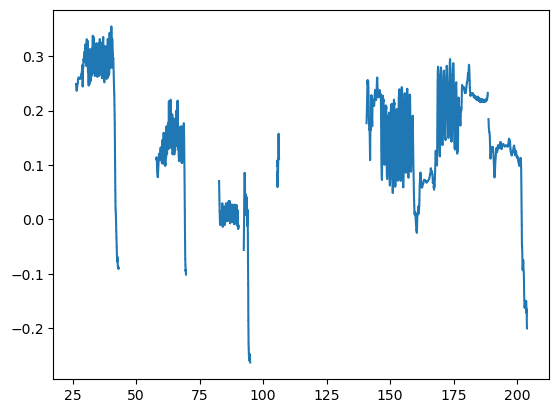

In [209]:
plt.plot(raw_file['program_time'], raw_file['index_tip_x'])

####################

In [508]:
folder = 'patientdata'
sub = 'ul003'
cond = 'm1s0'
cam = 'dt'
task1 = 'ps_1'
side = 'rh'
one_drive_path = find_paths.find_onedrive_path(folder)
one_drive_path

'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata'

In [509]:
raw_file_1 = import_dat.import_string_data(
    os.path.join(
    one_drive_path, sub, cam, 
    f'{sub}_{cond}_{cam}_{task1}', 
    f'{sub}_{cond}_{cam}_{task1}_{side}.csv'), 
    False)
raw_file_1

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:32:52:2991,13.6202,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09:32:52:3031,13.6241,0.0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09:32:52:3041,13.6251,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09:32:52:3041,13.6251,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09:32:52:3051,13.6261,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,09:33:12:5336,33.8547,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20329,09:33:12:5346,33.8556,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20330,09:33:12:5353,33.8563,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20331,09:33:12:5363,33.8574,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [510]:
folder = 'patientdata'
sub = 'ul003'
cond = 'm1s0'
cam = 'dt'
task2 = 'ps_2'
side = 'rh'
one_drive_path = find_paths.find_onedrive_path(folder)
one_drive_path

'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata'

In [511]:
raw_file_2 = import_dat.import_string_data(
    os.path.join(
    one_drive_path, sub, cam, 
    f'{sub}_{cond}_{cam}_{task2}', 
    f'{sub}_{cond}_{cam}_{task2}_{side}.csv'), 
    False)
raw_file_2

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:33:34:6221,14.3258,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09:33:34:6258,14.3295,0.0038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09:33:34:6269,14.3305,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09:33:34:6279,14.3315,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09:33:34:6279,14.3315,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13713,09:33:47:4856,27.1892,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,09:33:47:4861,27.1897,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,09:33:47:4871,27.1907,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13716,09:33:47:4880,27.1916,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [512]:
raw_files = [raw_file_1,raw_file_2]

In [514]:
raw_concat = pd.concat(raw_files)
display(raw_concat)

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:32:52:2991,13.6202,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09:32:52:3031,13.6241,0.0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09:32:52:3041,13.6251,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09:32:52:3041,13.6251,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09:32:52:3051,13.6261,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13713,09:33:47:4856,27.1892,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,09:33:47:4861,27.1897,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,09:33:47:4871,27.1907,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13716,09:33:47:4880,27.1916,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


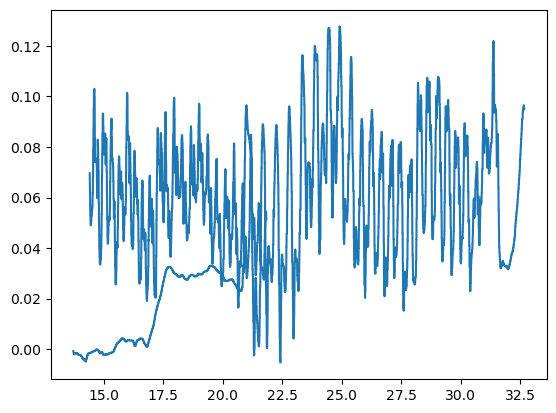

In [516]:
plt.plot(raw_concat['program_time'], raw_concat['index_tip_x'])

####################

In [210]:
side

'rh'

In [211]:
split_data = raw_file[
            np.logical_and(
                raw_file['global_time'] >= '09:34:08',
                raw_file['global_time'] <= '09:34:18'
                )
                ].reset_index(drop=True)
split_data

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:34:08:0033,189.7561,2.4597,0.1236,0.3808,-0.1180,0.0922,0.3886,-0.0819,0.0748,...,0.3966,-0.0261,0.1011,0.3617,-0.0257,0.0,0.0,70.7298,0.0,1.0
1,09:34:08:0083,189.7611,2.8766,0.1236,0.3808,-0.1180,0.0922,0.3886,-0.0819,0.0748,...,0.3966,-0.0261,0.1011,0.3617,-0.0257,0.0,0.0,70.7296,0.0,1.0
2,09:34:08:0097,189.7625,2.8923,0.1236,0.3808,-0.1180,0.0922,0.3886,-0.0819,0.0748,...,0.3966,-0.0261,0.1011,0.3617,-0.0257,0.0,0.0,70.7297,0.0,1.0
3,09:34:08:0134,189.7662,5.2903,0.1240,0.3794,-0.1165,0.0925,0.3865,-0.0801,0.0750,...,0.3937,-0.0244,0.1017,0.3596,-0.0243,0.0,0.0,71.0241,0.0,1.0
4,09:34:08:0189,189.7717,2.9310,0.1240,0.3794,-0.1165,0.0925,0.3865,-0.0801,0.0750,...,0.3937,-0.0244,0.1017,0.3596,-0.0243,0.0,0.0,71.0240,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,09:34:17:9775,199.7303,3.0532,0.1023,0.3856,-0.0801,0.0858,0.3626,-0.0391,0.0748,...,0.3448,0.0159,0.0969,0.3311,0.0035,0.0,0.0,63.0253,0.0,1.0
1426,09:34:17:9791,199.7319,4.0120,0.1023,0.3856,-0.0801,0.0858,0.3626,-0.0391,0.0748,...,0.3448,0.0159,0.0969,0.3311,0.0035,0.0,0.0,63.0252,0.0,1.0
1427,09:34:17:9915,199.7444,3.0373,0.1023,0.3856,-0.0801,0.0858,0.3626,-0.0391,0.0748,...,0.3448,0.0159,0.0969,0.3311,0.0035,0.0,0.0,63.0253,0.0,1.0
1428,09:34:17:9937,199.7466,2.9329,0.1020,0.3852,-0.0799,0.0855,0.3623,-0.0390,0.0744,...,0.3445,0.0160,0.0964,0.3305,0.0035,0.0,0.0,62.9573,0.0,1.0


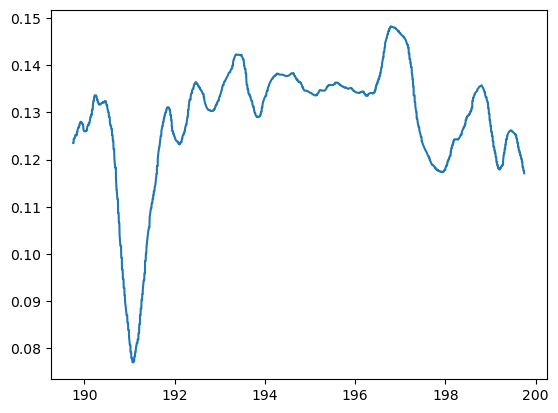

In [212]:
plt.plot(split_data['program_time'], split_data['index_tip_x'])

In [213]:
new_task = 'pt'
new_folder = f'{sub}_{cond}_{cam}_{new_task}'
new_folder

'ul012_m1s1_dt_pt'

In [214]:
path = f'C:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\{folder}\\{sub}\\{cam}\\{new_folder}'
if not os.path.exists(path):
    os.makedirs(path)
split_data.to_csv(os.path.join(path, f'{sub}_{cond}_{cam}_{new_task}_{side[0]}'+'h.csv'))

Cleaned Data

In [ ]:
clean_file = import_dat.import_string_data(os.path.join(one_drive_path, sub, cam, f'{sub}_{cond}_{cam}_{task}', f'{sub}_{cond}_{cam}_{task}_{side}.csv'), True)

In [ ]:
plt.plot(clean_file['program_time'], clean_file['index_tip_x'])

Calculate Sampling Rates

In [28]:
data = import_dat.import_string_data('C:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata\\ul004\\dt\\ul004_m1s0_dt_ft\\ul004_m1s0_desktop_ft_lh.csv', False)
data

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,11:32:32:5191,16.8808,0.0460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11:32:32:5692,16.9309,0.0058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11:32:32:5702,16.9319,0.0012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11:32:32:5711,16.9328,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:32:32:5719,16.9336,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78736,11:33:42:3200,86.6817,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78737,11:33:42:3206,86.6823,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78738,11:33:42:3216,86.6833,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78739,11:33:42:3217,86.6834,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
